Quantidade de Fechamento do dataset (1723, 2)
           Date      Close
0    2016-01-04  17.209999
1    2016-01-05  17.480000
2    2016-01-06  17.309999
3    2016-01-07  16.850000
4    2016-01-08  17.070000
...         ...        ...
1487 2021-12-23  15.550000
1488 2021-12-27  15.530000
1489 2021-12-28  15.520000
1490 2021-12-29  15.450000
1491 2021-12-30  15.420000

[1492 rows x 2 columns]
Total de dados para predição' :  1492
(1492, 1)
Treinamento:  1044
Teste:  448


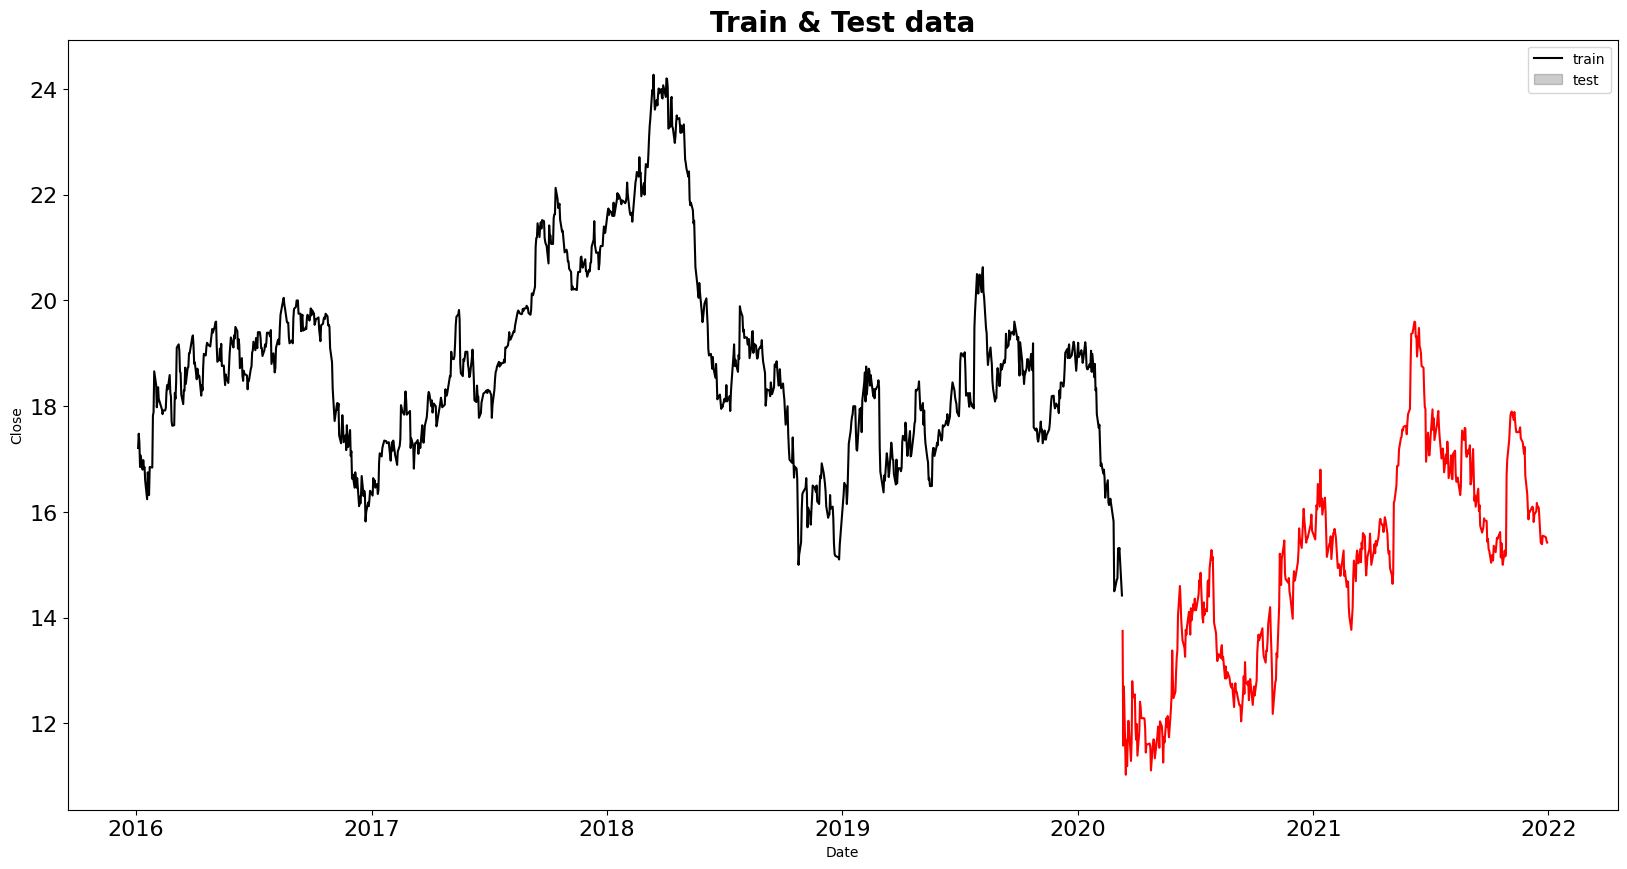

X_train:  (1028, 15)
y_train:  (1028,)
X_test:  (432, 15)
y_test (432,)
Mean Absolute Error - MAE : 0.01839627424369134
Root Mean squared Error - RMSE : 0.023931477155256453



In [23]:
from itertools import cycle
import plotly.express as px
%run e5-building-models.ipynb

In [26]:
def eval(model):
    train_predict, test_predict = predict(model)
    # shift train predictions for plotting
    look_back=time_step
    trainPredictPlot = np.empty_like(closedf)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(closedf)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
    
    original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
    original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
    

    
    names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

    plotdf = pd.DataFrame({'date': close_stock['Date'],
                           'original_close': close_stock['Close'],
                          'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                          'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

    fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                              plotdf['test_predicted_close']],
                  labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='Previsão com o modelo Regressão Linear',
                      plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Preço de fechamento')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
    
    ## Variance Regression Score
    print("\n\nTrain data explained variance regression score:", 
          explained_variance_score(original_ytrain, train_predict))
    print("Test data explained variance regression score:", 
          explained_variance_score(original_ytest, test_predict))

    ## R square score for regression
    print("\nTrain data R2 score:", r2_score(original_ytrain, train_predict))
    print("Test data R2 score:", r2_score(original_ytest, test_predict))

In [27]:
eval(LR)



Train data explained variance regression score: 0.9791247937225133
Test data explained variance regression score: 0.9718035330073679

Train data R2 score: 0.9791247937225133
Test data R2 score: 0.9716035440265489
